In [38]:
import tensorflow as tf 
from tensorflow import keras 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop, Adam 

from matplotlib import pyplot as plt 
import numpy as np 


In [48]:
#HERENCIA, se crea una clase a partir de otra clase, esta nueva clase contiene todo lo de la antigua clase.
class ODEsolver(Sequential): 
    def __init__(self, **kwargs): 
        super().__init__(**kwargs) #usamos el init de la clase Sequential
        self.loss_tracker = keras.metrics.Mean(name="loss") #funcion de costo
    
    @property 
    def metrics(self):
        return [self.loss_tracker]
    
    def train_step(self, data): #paso de entrenamiento
        
        batch_size = tf.shape(data)[0]
        
        #vector de numeros aleatorios
        x = tf.random.uniform((batch_size, 1), minval = -2, maxval = 2)
        
        
        #GradientTape es la funcion que calcula derivadas
        with tf.GradientTape() as tape:
            with tf.GradientTape() as tape2:
                tape2.watch(x) #vigila todas las operaciones que se hacen con la variable x
                y_pred = self(x, training = True) #evalua la derivada de cada valor de x
            
            dy = tape2.gradient(y_pred, x)
            
            #vectores de ceros
            x_o = tf.zeros((batch_size, 1))
            y_o = self(x_o, training = True)
            
            #funcion de costo, es la ecuacion diferencial dy/dx = -2xy
            eq = dy +2.*x*y_pred
            
            #initial condition, y(0) = 1
            ic = y_o - 1.
            
            #queremos que el error sea 0 
            loss = keras.losses.mean_squared_error(0., eq) + keras.losses.mean_squared_error(0., ic)
    
    #como cambia la funcion de costo, por ende, el loss, si cambian las trainable_variables (asi se llaman, ya estan definidas en la clase Sequential)
    #gradientes
        grads =tape.gradient(loss, self.trainable_variables)
    
    #muevete en direccion contraria a los gradientes, tiene como argumento el gradiente y su correspondiente variable
        self.optimizer.apply_gradients(zip(grads, self.trainable_variables))
    
    #guarda un historial de la perdida de la funcion de costo 
    #imprime el historial de la funcion de costo 
        return {"loss": self.loss_tracker.result()}
    


            
            

In [49]:
model = ODEsolver()

model.add(Dense(10, activation = "tanh", input_shape = (1, ) ))
model.add(Dense(1, activation = "tanh"))
model.add(Dense(1, activation ="linear"))


model.summary()
model.compile(optimizer =RMSprop(), metrics = ["loss"])


Model: "od_esolver_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 10)                20        
                                                                 
 dense_31 (Dense)            (None, 1)                 11        
                                                                 
 dense_32 (Dense)            (None, 1)                 2         
                                                                 
Total params: 33
Trainable params: 33
Non-trainable params: 0
_________________________________________________________________


Epoch 1/500
4/4 [==============================] - 1s 2ms/step - loss: 0.0000e+00
Epoch 2/500
4/4 [==============================] - 0s 3ms/step - loss: 0.0000e+00
Epoch 3/500
4/4 [==============================] - 0s 2ms/step - loss: 0.0000e+00
Epoch 4/500
4/4 [==============================] - 0s 1ms/step - loss: 0.0000e+00
Epoch 5/500
4/4 [==============================] - 0s 3ms/step - loss: 0.0000e+00
Epoch 6/500
4/4 [==============================] - 0s 3ms/step - loss: 0.0000e+00
Epoch 7/500
4/4 [==============================] - 0s 3ms/step - loss: 0.0000e+00
Epoch 8/500
4/4 [==============================] - 0s 4ms/step - loss: 0.0000e+00
Epoch 9/500
4/4 [==============================] - 0s 3ms/step - loss: 0.0000e+00
Epoch 10/500
4/4 [==============================] - 0s 3ms/step - loss: 0.0000e+00
Epoch 11/500
4/4 [==============================] - 0s 2ms/step - loss: 0.0000e+00
Epoch 12/500
4/4 [==============================] - 0s 3ms/step - loss: 0.0000e+00
Epoch 13/500


4/4 [==============================] - 0s 1ms/step - loss: 0.0000e+00
Epoch 100/500
4/4 [==============================] - 0s 1ms/step - loss: 0.0000e+00
Epoch 101/500
4/4 [==============================] - 0s 2ms/step - loss: 0.0000e+00
Epoch 102/500
4/4 [==============================] - 0s 997us/step - loss: 0.0000e+00
Epoch 103/500
4/4 [==============================] - 0s 1ms/step - loss: 0.0000e+00
Epoch 104/500
4/4 [==============================] - 0s 1ms/step - loss: 0.0000e+00
Epoch 105/500
4/4 [==============================] - 0s 1ms/step - loss: 0.0000e+00
Epoch 106/500
4/4 [==============================] - 0s 2ms/step - loss: 0.0000e+00
Epoch 107/500
4/4 [==============================] - 0s 997us/step - loss: 0.0000e+00
Epoch 108/500
4/4 [==============================] - 0s 2ms/step - loss: 0.0000e+00
Epoch 109/500
4/4 [==============================] - 0s 1ms/step - loss: 0.0000e+00
Epoch 110/500
4/4 [==============================] - 0s 997us/step - loss: 0.0000e+00


4/4 [==============================] - 0s 1ms/step - loss: 0.0000e+00
Epoch 197/500
4/4 [==============================] - 0s 2ms/step - loss: 0.0000e+00
Epoch 198/500
4/4 [==============================] - 0s 1ms/step - loss: 0.0000e+00
Epoch 199/500
4/4 [==============================] - 0s 1ms/step - loss: 0.0000e+00
Epoch 200/500
4/4 [==============================] - 0s 1ms/step - loss: 0.0000e+00
Epoch 201/500
4/4 [==============================] - 0s 1ms/step - loss: 0.0000e+00
Epoch 202/500
4/4 [==============================] - 0s 2ms/step - loss: 0.0000e+00
Epoch 203/500
4/4 [==============================] - 0s 1ms/step - loss: 0.0000e+00
Epoch 204/500
4/4 [==============================] - 0s 2ms/step - loss: 0.0000e+00
Epoch 205/500
4/4 [==============================] - 0s 997us/step - loss: 0.0000e+00
Epoch 206/500
4/4 [==============================] - 0s 1ms/step - loss: 0.0000e+00
Epoch 207/500
4/4 [==============================] - 0s 2ms/step - loss: 0.0000e+00
Epoc

4/4 [==============================] - 0s 2ms/step - loss: 0.0000e+00
Epoch 294/500
4/4 [==============================] - 0s 998us/step - loss: 0.0000e+00
Epoch 295/500
4/4 [==============================] - 0s 2ms/step - loss: 0.0000e+00
Epoch 296/500
4/4 [==============================] - 0s 1ms/step - loss: 0.0000e+00
Epoch 297/500
4/4 [==============================] - 0s 2ms/step - loss: 0.0000e+00
Epoch 298/500
4/4 [==============================] - 0s 1ms/step - loss: 0.0000e+00
Epoch 299/500
4/4 [==============================] - 0s 1ms/step - loss: 0.0000e+00
Epoch 300/500
4/4 [==============================] - 0s 1ms/step - loss: 0.0000e+00
Epoch 301/500
4/4 [==============================] - 0s 998us/step - loss: 0.0000e+00
Epoch 302/500
4/4 [==============================] - 0s 2ms/step - loss: 0.0000e+00
Epoch 303/500
4/4 [==============================] - 0s 1ms/step - loss: 0.0000e+00
Epoch 304/500
4/4 [==============================] - 0s 3ms/step - loss: 0.0000e+00
Ep

4/4 [==============================] - 0s 997us/step - loss: 0.0000e+00
Epoch 391/500
4/4 [==============================] - 0s 2ms/step - loss: 0.0000e+00
Epoch 392/500
4/4 [==============================] - 0s 1ms/step - loss: 0.0000e+00
Epoch 393/500
4/4 [==============================] - 0s 3ms/step - loss: 0.0000e+00
Epoch 394/500
4/4 [==============================] - 0s 1ms/step - loss: 0.0000e+00
Epoch 395/500
4/4 [==============================] - 0s 2ms/step - loss: 0.0000e+00
Epoch 396/500
4/4 [==============================] - 0s 1ms/step - loss: 0.0000e+00
Epoch 397/500
4/4 [==============================] - 0s 3ms/step - loss: 0.0000e+00
Epoch 398/500
4/4 [==============================] - 0s 998us/step - loss: 0.0000e+00
Epoch 399/500
4/4 [==============================] - 0s 2ms/step - loss: 0.0000e+00
Epoch 400/500
4/4 [==============================] - 0s 1ms/step - loss: 0.0000e+00
Epoch 401/500
4/4 [==============================] - 0s 3ms/step - loss: 0.0000e+00
Ep

4/4 [==============================] - 0s 2ms/step - loss: 0.0000e+00
Epoch 488/500
4/4 [==============================] - 0s 2ms/step - loss: 0.0000e+00
Epoch 489/500
4/4 [==============================] - 0s 3ms/step - loss: 0.0000e+00
Epoch 490/500
4/4 [==============================] - 0s 4ms/step - loss: 0.0000e+00
Epoch 491/500
4/4 [==============================] - 0s 1ms/step - loss: 0.0000e+00
Epoch 492/500
4/4 [==============================] - 0s 3ms/step - loss: 0.0000e+00
Epoch 493/500
4/4 [==============================] - 0s 2ms/step - loss: 0.0000e+00
Epoch 494/500
4/4 [==============================] - 0s 997us/step - loss: 0.0000e+00
Epoch 495/500
4/4 [==============================] - 0s 4ms/step - loss: 0.0000e+00
Epoch 496/500
4/4 [==============================] - 0s 1ms/step - loss: 0.0000e+00
Epoch 497/500
4/4 [==============================] - 0s 2ms/step - loss: 0.0000e+00
Epoch 498/500
4/4 [==============================] - 0s 2ms/step - loss: 0.0000e+00
Epoc

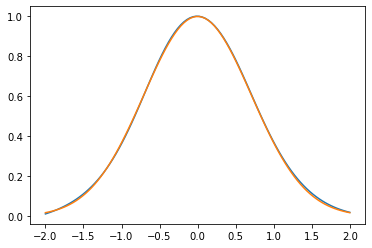

In [50]:
x = tf.linspace(-2, 2, 100) 
history = model.fit(x, epochs = 500, verbose =1) 

#dominio 
x_testv = tf.linspace(-2, 2, 100)

a = model.predict(x_testv)



In [ ]:
#model.save("rna_edo_solver1")

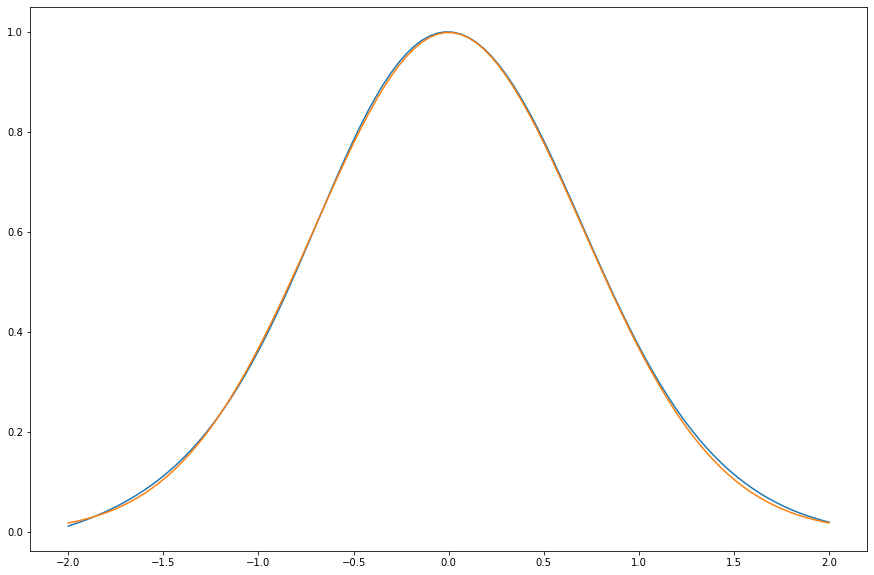

In [52]:
plt.figure(figsize = (15,10))
plt.plot(x_testv, a)
#comparamos la solucion numerica dada por la RNA con la solucion analitica
plt.plot(x_testv, np.exp(-x*x)) #la solucion analitica es: y = e^{-x^2}
plt.show()